# visualize custom pcd

In [1]:
import os, json
import numpy as np

PCD_BIN_DIR = "/data/NIA50/OpenPCD/data/custom/labels_bin/" # Path to the directory containing the binary labels
SAMPLE_CALIB = "/data/NIA50/data/2-050_sensor_sample/calib/camera"

front_calib_path = os.path.join(SAMPLE_CALIB, "front.json")

with open(front_calib_path, "r") as f:
    front_calib = json.load(f)

ext_mat = front_calib["extrinsic"]
int_mat = front_calib["intrinsic"]

print("ext_mat: \n", ext_mat)
print("int_mat: \n", int_mat)

ext_mat_np = np.array(ext_mat).reshape(4, 4)[:3, :]
int_mat_np = np.array(int_mat).reshape(3, 3)

print("ext_mat_np: \n", ext_mat_np)
print("int_mat_np: \n", int_mat_np)

P = np.matmul(int_mat_np, ext_mat_np)
print("P: \n", P)

ext_mat: 
 [0.999878496, -0.000430242, -0.015590121, -0.139514742, 0.015596038, -0.025277451, -0.999559203, -0.888712418, 3.59946e-05, -0.999680916, 0.025281548, -3.000805838, 0, 0, 0, 1]
int_mat: 
 [-651.2083577, 0.0, 658.4384148, 0.0, 661.5906407, 544.532226, 0.0, 0.0, 1.0]
ext_mat_np: 
 [[ 9.99878496e-01 -4.30242000e-04 -1.55901210e-02 -1.39514742e-01]
 [ 1.55960380e-02 -2.52774510e-02 -9.99559203e-01 -8.88712418e-01]
 [ 3.59946000e-05 -9.99680916e-01  2.52815480e-02 -3.00080584e+00]]
int_mat_np: 
 [[-651.2083577    0.         658.4384148]
 [   0.         661.5906407  544.532226 ]
 [   0.           0.           1.       ]]
P: 
 [[-6.51105533e+02 -6.57948140e+02  2.67987595e+01 -1.88499267e+03]
 [ 1.03377930e+01 -5.61081799e+02 -6.47532396e+02 -2.22199930e+03]
 [ 3.59946000e-05 -9.99680916e-01  2.52815480e-02 -3.00080584e+00]]


# Load point cloud(npy) file and visualize

/data/NIA50/OpenPCD/data/2-050_sensor_sample/points/1639543834.775967121.npy
points.shape:  (276640, 3)
points_crop.shape:  (20002, 3)
min_x:  -236.1417 	min_y:  -196.50537 	min_z:  -22.684496
max_x:  222.93367 	max_y:  222.68224 	max_z:  48.680103
cmin_x:  -14.987107 	cmin_y:  0.00023437105 	cmin_z:  -2.9987564
cmax_x:  14.998499 	cmax_y:  54.23506 	cmax_z:  -0.00020056963
crop x, y, z:  (-15, 15) (0, 55) (-3, 0)


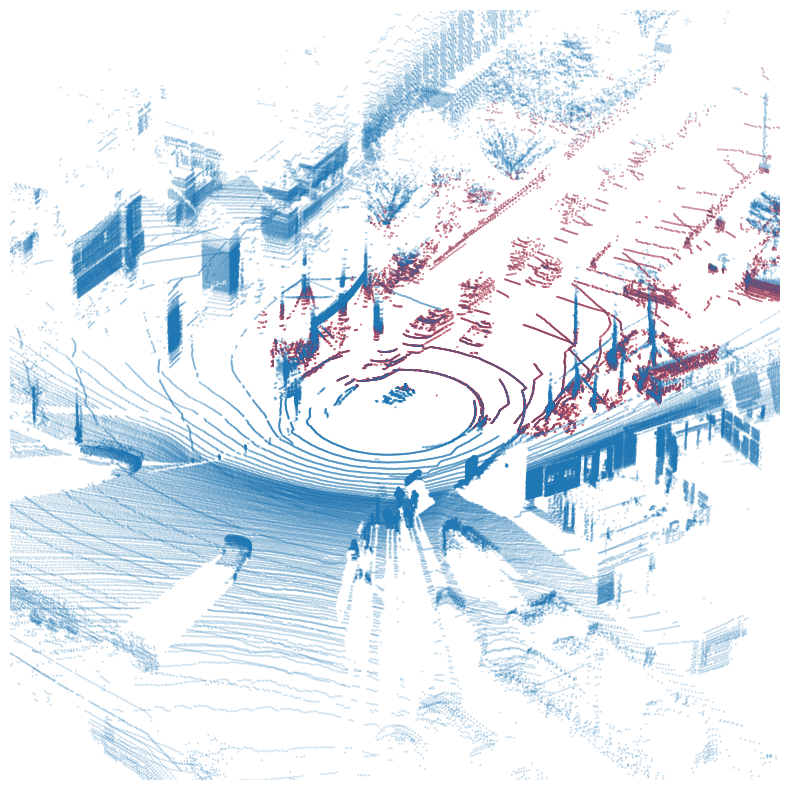

In [7]:
import numpy as np
from glob import glob

NP_POINTS_DIR = "/data/NIA50/OpenPCD/data/2-050_sensor_sample/points/"

np_pcd_files = sorted(glob(os.path.join(NP_POINTS_DIR, "*.npy")))

idx = 90
np_pcd_file = np_pcd_files[idx]
print(np_pcd_file)

points = np.load(np_pcd_file)
print("points.shape: ", points.shape)
# crop the points
crop_x = (-15, 15)
crop_y = (0, 55)
crop_z = (-3, 0)
points_crop = points[(points[:, 0] > crop_x[0]) & (points[:, 0] < crop_x[1]) & (points[:, 1] > crop_y[0]) & (points[:, 1] < crop_y[1]) & (points[:, 2] > crop_z[0]) & (points[:, 2] < crop_z[1])]
print("points_crop.shape: ", points_crop.shape)

max_x, max_y, max_z = np.max(points, axis=0)
min_x, min_y, min_z = np.min(points, axis=0)
print("min_x: ", min_x, "\tmin_y: ", min_y, "\tmin_z: ", min_z)
print("max_x: ", max_x, "\tmax_y: ", max_y, "\tmax_z: ", max_z)
cmax_x, cmax_y, cmax_z = np.max(points_crop, axis=0)
cmin_x, cmin_y, cmin_z = np.min(points_crop, axis=0)
print("cmin_x: ", cmin_x, "\tcmin_y: ", cmin_y, "\tcmin_z: ", cmin_z)
print("cmax_x: ", cmax_x, "\tcmax_y: ", cmax_y, "\tcmax_z: ", cmax_z)
print("crop x, y, z: ", crop_x, crop_y, crop_z)

points = np.hstack((points, np.ones((len(points), 1))))
points_crop = np.hstack((points_crop, np.ones((len(points_crop), 1))))

# view bird's eye view

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# hide axes, set background color to white
# x: left to right, y: front to back, z: bottom to top

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], cmap='viridis', s = 0.1)
ax.scatter(points_crop[:, 0], points_crop[:, 1], points_crop[:, 2], cmap='viridis', color='red', s = 0.1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.set_facecolor('white')
ax.set_axis_off()
plt.show()

# save croped point cloud

In [8]:
import numpy as np
from glob import glob
from tqdm import tqdm

NP_POINTS_DIR = "/data/NIA50/OpenPCD/data/2-050_sensor_sample/points/"
NP_CROPED_DIR = "/data/NIA50/OpenPCD/data/2-050_sensor_sample/points_croped_front/"

np_pcd_list = sorted(glob(os.path.join(NP_POINTS_DIR, "*.npy")))

# crop the points
crop_x = (-15, 15)
crop_y = (0, 55)
crop_z = (-3, 0)
print("points_crop x, y, z: ", crop_x, crop_y, crop_z)

for np_file in tqdm(np_pcd_list):
    points = np.load(np_file)
    
    points_crop_front = points[(points[:, 0] > crop_x[0]) & (points[:, 0] < crop_x[1]) & (points[:, 1] > crop_y[0]) & (points[:, 1] < crop_y[1]) & (points[:, 2] > crop_z[0]) & (points[:, 2] < crop_z[1])]
    
    np.save(os.path.join(NP_CROPED_DIR, os.path.basename(np_file)), points_crop_front)
    
    

points_crop x, y, z:  (-15, 15) (0, 55) (-3, 0)


100%|██████████| 100/100 [00:11<00:00,  8.86it/s]


In [ ]:
# save croped labels
from glob import glob
from tqdm import tqdm
import json

LABEL_3D_DIR = "/data/NIA50/OpenPCD/data/2-050_sensor_sample/label/"
LABEL_CROPED_3D_DIR = "/data/NIA50/OpenPCD/data/2-050_sensor_sample/label_croped_front/"
